In [17]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt
import matplotlib as mpl
from _FigureJiazeHelper import *
from _HyperSBM import *
from _HyperCommunityDetection import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=10)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 10  # 'large'
plt.rcParams['lines.markersize'] = 12
plt.rcParams['axes.linewidth'] = 0.5

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

# The Density of NB & BH

## network
- $d_v$ is degree of node v
- $n$ is number of nodes
- $m$ is number of edges, $m=\sum_v\frac{d_v}{2}$

The deminsion of NB is $2m$, the number of nonzero of NB is $\sum_vd_v(d_v-1)$

The deminsion of BH is $n$, the number of nonzero of BH is $m+n$

## Hypergraph
- $d_{vk}$ is degree of node v with $k$ size hyperedge
- $d_{v}$ is degree of node v,  $d_v=\sum_kd_{vk}$
- $n$ is number of nodes
- $m$ is number of edges, $m=\sum_k\sum_v\frac{d_{vk}}{k}$

The deminsion of NB is $\sum_v\sum_kd_{vk}=\sum_vd_v$, the number of nonzero of NB is $\sum_v\sum_kd_{vk}(k-1)(d_v-1)$

The deminsion of BH is $n$, the number of nonzero of BH depends on hypergraph, with form $x+n$ where $x<m$.

In [15]:
n = 100
q = 2

Generating hyper edges for order 2...


4950it [00:00, 35094.51it/s]


# of nodes 100, # of edges 249, cin=8.474576271186441, cout=1.6949152542372883
{2: 249}
NB: dimension 498, nonzero 2910.0, density 0.011733681714811052
BH: dimension 100, nonzero 598, density 0.0598


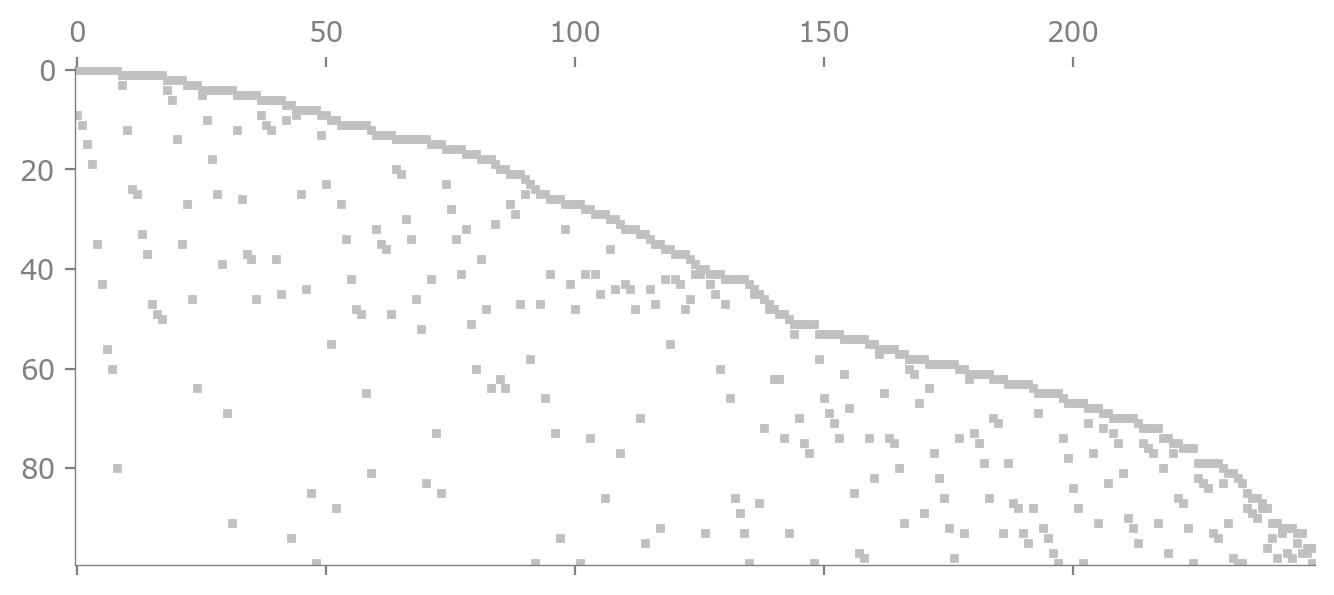

In [31]:
Ks = [2]
d = 5
epsilon = 0.2
temp = 0
for k in Ks:
    temp += q * comb(int(n/q), k) * k / (n**k) + epsilon * (comb(n, k) - q * comb(int(n/q), k)) * k / (n**k)
cin = d / temp
cout = epsilon * cin
hsbm = UnUniformSymmetricHSBM(n, q, Ks, cin, cout)
print(f'# of nodes {hsbm.n}, # of edges {hsbm.e}, cin={cin}, cout={cout}')
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.H, markersize=2, rasterized=True, color=gray)
statistic_NBBH(hsbm)

In [27]:
def statistic_NBBH(hsbm):
    NB_dim = hsbm.H.sum()
    NB_nonzero = 0
    edge_order = hsbm.H.sum(axis=0).flatten()
    Dv = hsbm.H.sum(axis=1)
    # print(type(Dv))
    for k in Ks:
        edge_index = np.where(edge_order == k)[0]
        Hk = hsbm.H[:, edge_index]
        Dvk = Hk.sum(axis=1).flatten().astype(float)
        for i in range(np.size(Dv)):
            NB_nonzero += Dvk[i] * (k-1) * Dv[i] 
    NB_density = NB_nonzero / (NB_dim**2)
    BH_dim = hsbm.n
    BH_nonzero = 0
    edge_order, edge_count = np.unique(hsbm.H.sum(axis=0).flatten(), return_counts=True)
    order_count = dict(zip(edge_order, edge_count))
    print(order_count)
    ds = dict()
    for o in order_count:
        ds[o] = o * order_count[o] / n
    bulk = 0
    for k in Ks:
        bulk += ds[k] * (k - 1)
    bulk = np.sqrt(bulk)
    BH = hsbm.get_operator(operator='BH', r=bulk)
    BH_nonzero = np.size(BH.nonzero()[0])
    BH_density = BH_nonzero / (BH_dim**2)
    print(f'NB: dimension {NB_dim}, nonzero {NB_nonzero}, density {NB_density}')
    print(f'BH: dimension {BH_dim}, nonzero {BH_nonzero}, density {BH_density}')

Generating hyper edges for order 2...


4950it [00:00, 38064.18it/s]


Generating hyper edges for order 3...


161700it [00:03, 40503.81it/s]


Generating hyper edges for order 4...


3921225it [01:39, 39264.29it/s]


# of nodes 100, # of edges 223, cin=6.044421663690797, cout=1.2088843327381595
{2: 170, 3: 45, 4: 8}
NB: dimension 507, nonzero 4294.0, density 0.016704986208855122
BH: dimension 100, nonzero 780, density 0.078


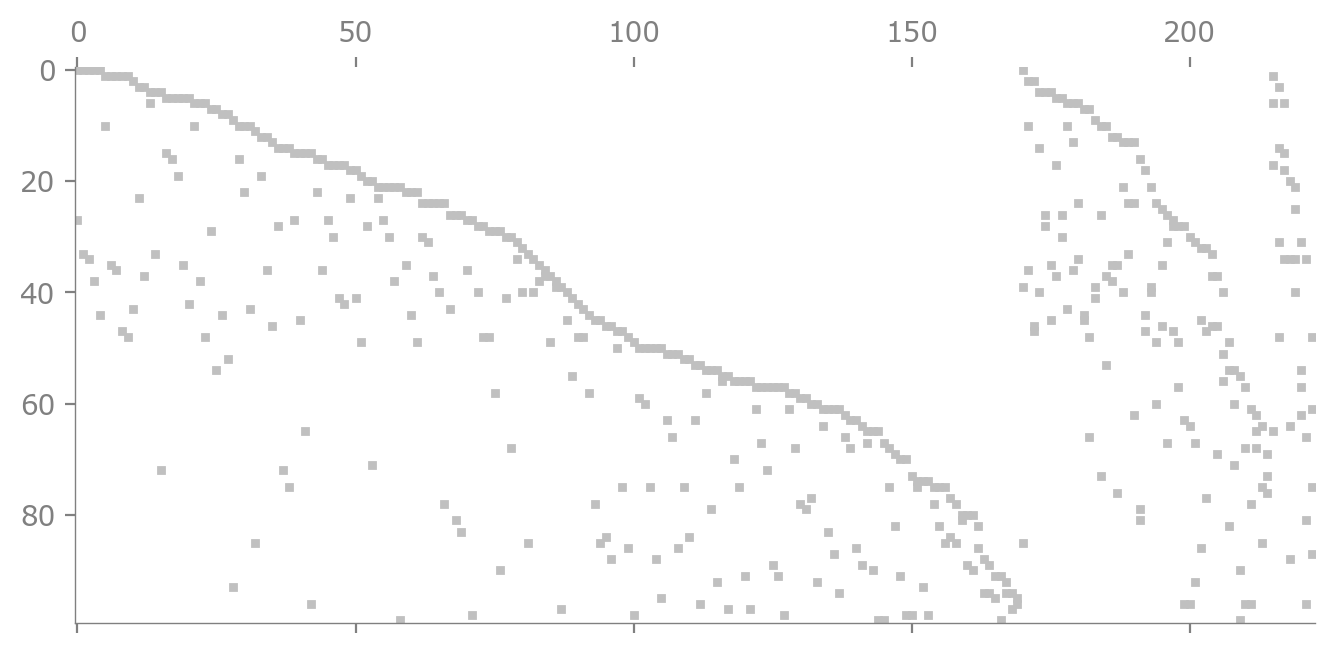

In [33]:
Ks = [2, 3, 4]
d = 5
epsilon = 0.2
temp = 0
for k in Ks:
    temp += q * comb(int(n/q), k) * k / (n**k) + epsilon * (comb(n, k) - q * comb(int(n/q), k)) * k / (n**k)
cin = d / temp
cout = epsilon * cin
hsbm = UnUniformSymmetricHSBM(n, q, Ks, cin, cout)
print(f'# of nodes {hsbm.n}, # of edges {hsbm.e}, cin={cin}, cout={cout}')
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.H, markersize=2, rasterized=True, color=gray)
statistic_NBBH(hsbm)